<a href="https://colab.research.google.com/github/danielcesar82/br-classification-project/blob/master/classification_project_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
url='https://raw.githubusercontent.com/awarischool/br-classification-project/master/Churn_Modelling.csv'

### 3.1 Análise exploratória

In [39]:
churn = pd.read_csv(url)
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
# Verificando a quantidade de linhas e de colunas do dataset.
churn.shape

(10000, 14)

In [41]:
churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [42]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [43]:
# Verificação de valores ausentes.
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

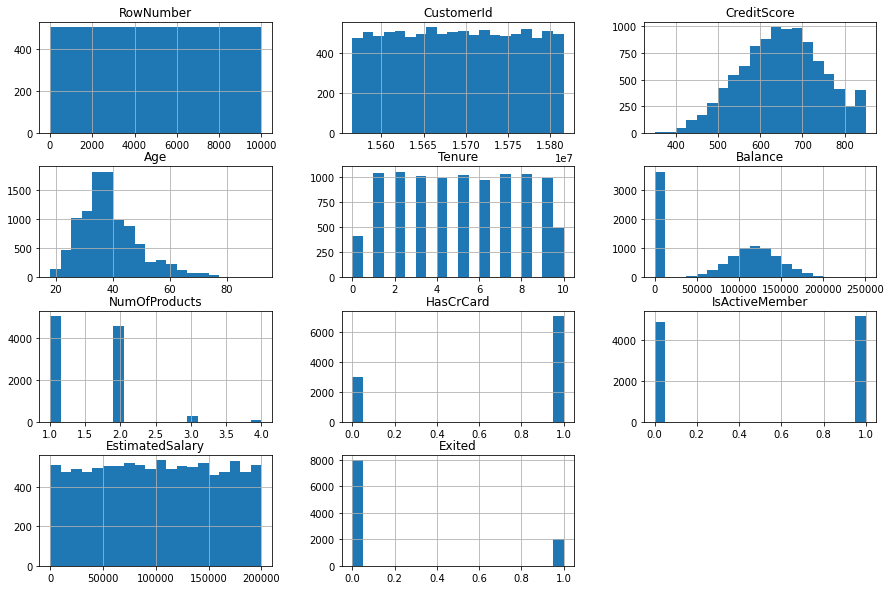

In [45]:
churn.hist(figsize=(15,10), bins=20)
plt.plot()
plt.show()

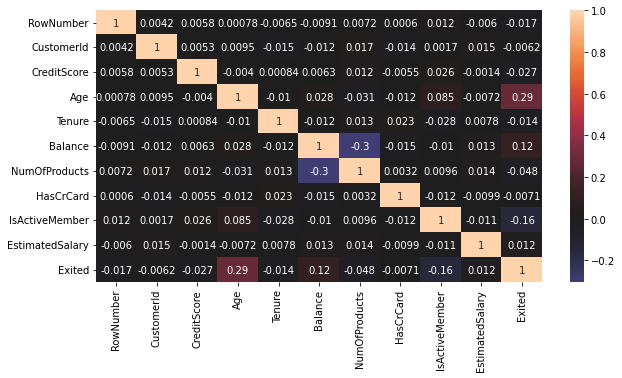

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(churn.corr(), annot=True, center=0)
plt.plot()
plt.show()

### 3.2 Preparação e limpeza dos dados

### 3.3 Seleção de atributos

In [47]:
# Seleção de Variáveis do Modelo
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'CreditScore', 'Tenure', 'NumOfProducts', 'HasCrCard',
                    'EstimatedSalary'], axis=1)

In [48]:
churn.head()

,Age,Balance,IsActiveMember,Exited
0,42,0.00,1,1
1,41,83807.86,1,0
2,42,159660.80,0,1
3,39,0.00,0,0
4,43,125510.82,1,0


### 3.4 Construção do modelo

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(churn[['Age', 'Balance', 'IsActiveMember']], churn['Exited'], test_size=0.2, random_state=1)

In [50]:
X_train.shape

(8000, 3)

In [51]:
X_test.shape

(2000, 3)

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['Age', 'Balance']] = sc.fit_transform(X_train[['Age', 'Balance']])
X_test[['Age', 'Balance']] = sc.transform(X_test[['Age', 'Balance']])

In [53]:
X_train.head()

,Age,Balance,IsActiveMember
2694,-0.944500,0.588173,1
5140,-0.944500,0.469849,0
2568,0.774987,0.858788,1
3671,1.252622,0.565604,1
7427,-0.562392,0.730395,0


In [54]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 2)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [55]:
y_pred_logistic = logistic.predict(X_test)

In [56]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [57]:
y_pred_tree = tree.predict(X_test)

In [58]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
y_pred_forest = forest.predict(X_test)

In [72]:
# SVM
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [61]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred_naive = naive.predict(X_test)

### 3.5 Avaliação do modelo

In [62]:
from sklearn.metrics import accuracy_score
logistic_accuracy = accuracy_score(y_test, y_pred_logistic) * 100
logistic_accuracy

80.80000000000001

In [63]:
tree_accuracy = accuracy_score(y_test, y_pred_tree) * 100
tree_accuracy

76.6

In [64]:
forest_accuracy = accuracy_score(y_test, y_pred_forest) * 100
forest_accuracy

77.9

In [65]:
svm_accuracy = accuracy_score(y_test, y_pred_svm) * 100
svm_accuracy

79.25

In [66]:
naive_accuracy = accuracy_score(y_test, y_pred_svm) * 100
naive_accuracy

79.25

### 3.4 Otimização do modelo

In [75]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10)
print("Acurácia: {:.2f} %".format(accuracies.mean()*100))
print("Desvio Padrão: {:.2f} %".format(accuracies.std()*100))

Acurácia: 80.67 %
Desvio Padrão: 0.69 %


## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.